In [453]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

#### Read data

In [454]:
df = pd.read_csv('../../../datasets/parte2/treino/dataset_prepared.csv', na_filter=False)

In [455]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               11016 non-null  float64
 1   feels_like         11016 non-null  float64
 2   temp_min           11016 non-null  float64
 3   temp_max           11016 non-null  float64
 4   pressure           11016 non-null  int64  
 5   humidity           11016 non-null  int64  
 6   wind_speed         11016 non-null  float64
 7   clouds_all         11016 non-null  int64  
 8   hour               11016 non-null  int64  
 9   normal             11016 non-null  float64
 10  economic_schedule  11016 non-null  float64
 11  self-consumption   11016 non-null  float64
 12  injection          11016 non-null  object 
 13  month              11016 non-null  int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 1.2+ MB
None


In [456]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,hour,normal,economic_schedule,self-consumption,injection,month
0,13.97,13.54,11.45,14.04,1027,81,1.96,87,0,0.0,0.0,0.0,None,9
1,13.48,13.02,13.43,13.90,1028,82,1.83,91,1,0.0,0.0,0.0,None,9
2,12.93,12.47,12.72,13.43,1027,84,1.96,93,2,0.0,0.0,0.0,None,9
3,12.61,12.15,10.34,12.93,1027,85,1.85,95,3,0.0,0.0,0.0,None,9
4,12.61,12.17,9.79,12.93,1027,86,1.83,93,4,0.0,0.0,0.0,None,9


#### X and y arrays

In [457]:
X = df.drop('injection', axis=1)
y = df['injection']

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

#### Training 

Using GridSearchCV to find the best hyperparameters

In [459]:
# Use GridSearchCV para encontrar os melhores hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy', 'ratio', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier(random_state=2023)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, refit=True, cv=5, verbose=2, n_jobs=-1) # scoring='f1'
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, ma

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
315 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/sklearn/base.py", li

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'ratio', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

Inspect the best parameters

In [460]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [461]:
grid_search.best_score_

0.8534562599346195

Get the best estimator

In [462]:
clf = grid_search.best_estimator_

Get the predictions using the trained model

In [463]:
predictions = clf.predict(X_test)

#### Model Evaluation

Classification report

In [464]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.61      0.71      0.66       303
         Low       0.44      0.46      0.45       135
      Medium       0.62      0.55      0.58       316
        None       0.98      0.97      0.97      2377
   Very_High       0.74      0.73      0.74       174

    accuracy                           0.87      3305
   macro avg       0.68      0.68      0.68      3305
weighted avg       0.87      0.87      0.87      3305



Accuracy Score

In [465]:
accuracy_score(y_test, predictions) # 0.8717095310136157

0.8717095310136157

Confusion Matrix

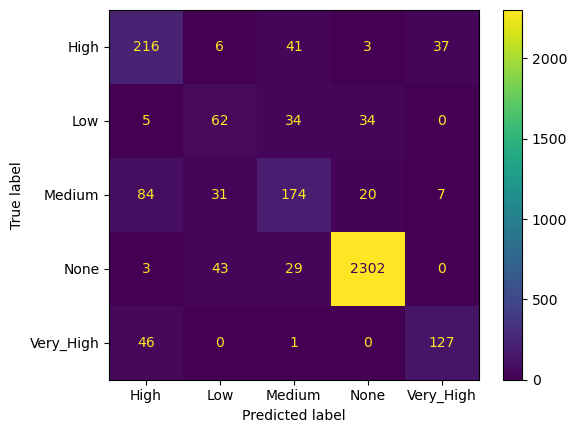

In [466]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [467]:
#df_predicoes = pd.DataFrame({'Result': predictions})
#df_predicoes['RowId'] = range(1, len(predictions) + 1)
#df_predicoes = df_predicoes[['RowId', 'Result']]

#df_predicoes.to_csv('../../../datasets/parte2/teste/previsoesDecisionTreeClassifier.csv', index=False)